In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


All data files should be listed here

Note: in future this may be implemented with os module and name conventions like 

`for "{chanel_name}_reactions_dataset*.csv" in folder`

In [ ]:
import pandas as pd

# "_bert" or ""
is_bert = "_bert"
is_num = "num_"

with open(f'/content/drive/MyDrive/reaction_prediction/tsn_reactions_dataset{is_bert}.csv') as f:
  data = pd.read_csv(f, index_col = 0)
  
with open(f'/content/drive/My Drive/reaction_prediction/tsn_reactions_dataset_from_2_jul{is_bert}.csv') as f:
  data_from_2_jul = pd.read_csv(f, index_col = 0)

with open(f'/content/drive/My Drive/reaction_prediction/tsn_reactions_dataset_from_Sep_21{is_bert}.csv') as f:
  data_from_Sep_21 = pd.read_csv(f, index_col = 0)

with open(f'/content/drive/My Drive/reaction_prediction/hromadske_reactions_dataset_from_1_march{is_bert}.csv') as hr:
  data_hr = pd.read_csv(hr, index_col = 0)

with open(f'/content/drive/My Drive/reaction_prediction/ukraine_now_reactions_dataset_from_1_march{is_bert}.csv') as un:
  data_un = pd.read_csv(un, index_col = 0)

In [ ]:
data = pd.concat([data.reset_index(drop=True), 
                  data_from_2_jul.reset_index(drop=True),
                  data_from_Sep_21.reset_index(drop=True),
                  data_hr.reset_index(drop=True),
                  data_un.reset_index(drop=True)], axis = 0)

In [ ]:
data = data.reset_index(drop=True)
data

,msg_text,clown_face,thumbs_up,thumbs_down,red_heart,fire,smiling_face_with_hearts,clapping_hands,beaming_face_with_smiling_eyes,thinking_face,exploding_head,face_screaming_in_fear,face_with_symbols_on_mouth,crying_face,party_popper,star-struck,face_vomiting,pile_of_poo
0,"Чий борщ? У п’ятницю, липня, ЮНЕСКО вирішить д...",0.0,0.046779,0.000000,0.720624,0.004455,0.019677,0.004270,0.142565,0.013922,0.036570,0.0,0.007611,0.001114,0.002413,0.0,0.000000,0.000000
1,Зруйнований міст у Демидові на Київщині планую...,0.0,0.807922,0.002555,0.081772,0.011499,0.004259,0.001278,0.002981,0.058773,0.000000,0.0,0.000000,0.024702,0.000000,0.0,0.001278,0.002981
2,"Безперечно, головне слово сьогодні – «Зміїний»...",0.0,0.750110,0.002428,0.168874,0.015673,0.031788,0.023179,0.001987,0.001987,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.003974,0.000000
3,"Прокремлівське видання ""Общественная служба но...",0.0,0.081781,0.001136,0.001817,0.006815,0.002953,0.011586,0.814630,0.004998,0.034757,0.0,0.006134,0.000000,0.000000,0.0,0.033394,0.000000
4,"Продовжується відвантаження боєприпасів, продо...",0.0,0.453347,0.006853,0.007380,0.007380,0.000000,0.002636,0.003163,0.033737,0.055351,0.0,0.397470,0.018977,0.000000,0.0,0.013706,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63489,Жителі Черкас! Сьогодні на окраїні міста з : д...,0.0,0.000000,0.000000,0.858846,0.092934,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.048220,0.000000,0.0,0.000000,0.000000
63490,Командування ВПС ЗСУ: Під час нальоту окупанті...,0.0,0.000000,0.000000,0.820247,0.157868,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.021884,0.000000,0.0,0.000000,0.000000
63491,УВАГА! Повітряна тривога у Вінниці і Черкасах!,0.0,0.000000,0.000000,0.025105,0.022315,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.952580,0.000000,0.0,0.000000,0.000000
63492,УВАГА! У Києві оголошена повітряна тривога! Пр...,0.0,0.000000,0.000000,0.032336,0.014479,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.953185,0.000000,0.0,0.000000,0.000000


In [ ]:
data.shape

(63494, 18)

In [ ]:
if is_num == 'num_':
  print('cool')
  data.to_csv(f'/content/drive/My Drive/reaction_prediction/{is_num}concatenated_pos_neg{is_bert}.csv')

cool


# Data Preparation

For this model we will divide reactions into two categories: 
- positive - 1 
- negative - 0

Positive consist of 👍, ❤, 🔥, 🥰, 👏, 😁, 🤯, 🎉, 🤩

Negative consist of 👎, 🤡, 🤔, 😱, 🤬, 😢, 🤮, 💩

data.columns

In [ ]:
pos_reacts = ['thumbs_up',  'red_heart', 'fire', 'smiling_face_with_hearts', 'clapping_hands',
             'beaming_face_with_smiling_eyes', 'exploding_head', 'party_popper', 'star-struck']
neg_reacts = ['thumbs_down', 'clown_face', 'thinking_face', 'face_screaming_in_fear', 'face_with_symbols_on_mouth', 'crying_face',
              'face_vomiting', 'pile_of_poo']

In [ ]:
data['pos_sum'] = data[pos_reacts].sum(axis = 1)
data['neg_sum'] = data[neg_reacts].sum(axis = 1)
data.loc[:, ['pos_sum', 'neg_sum']]

,pos_sum,neg_sum
0,0.977353,0.022647
1,0.909710,0.090290
2,0.991611,0.008389
3,0.954339,0.045661
4,0.529257,0.470743
...,...,...
63489,0.951780,0.048220
63490,0.978116,0.021884
63491,0.047420,0.952580
63492,0.046815,0.953185


In [ ]:
data.loc[:, ['pos_sum', 'neg_sum']] = data.loc[:, ['pos_sum', 'neg_sum']].applymap(lambda x: 1 if x > 0.5 else 0)

In [ ]:
data.loc[:,['pos_sum','neg_sum']].sum(axis = 0)

pos_sum    36647
neg_sum    26847
dtype: int64

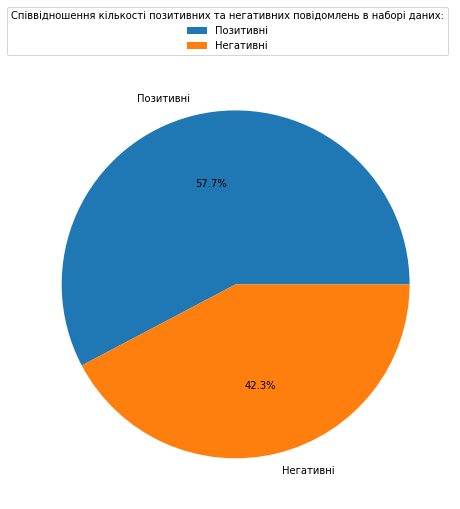

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(data.loc[:,['pos_sum','neg_sum']].sum(axis = 0))
mylabels = ['Позитивні', 'Негативні']

plt.figure(figsize=(11, 8))
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.legend(bbox_to_anchor =(1, 1.15),title = "Співвідношення кількості позитивних та негативних повідомлень в наборі даних:")
plt.savefig('pos_neg_pie.png')

plt.show()

Making one column for reaction type: 1 for positive, 0 for negative

In [ ]:
data['reaction_type'] = data['pos_sum']
data = data.loc[:, ['msg_text', 'reaction_type']]

In [ ]:
data.to_csv(f'/content/drive/My Drive/reaction_prediction/concatenated_pos_neg{is_bert}.csv')